In [1]:
using Distributions, TimeIt, ProgressMeter, PyPlot, JLD
include("/home/postdoc/dsen/Desktop/codes/G-ZZ_clean/jl_files/zz_samplers.jl")
include("temp.jl")

run_sampler (generic function with 4 methods)

In [2]:
X, y = load("shrinkage_data_1.jld", "X", "y")
d, Nobs = size(X)
σ02 = 1
my_pr = SS_prior(d, σ02)
my_ll = ll_logistic_sp(X,y)
my_model = model(my_ll, my_pr);

In [6]:
print("d = ", d, ", N = ", Nobs)

d = 51, N = 250

### GZZ:

In [238]:
mb_size = 1
max_attempts = 10^6
lambda = 5e1
Print = true;

In [239]:
start = time()
run_sampler(my_model, lambda, max_attempts, mb_size, Print) 
print("Sampling in ", round((time()-start)/60,1), " mins \n")

10 percent attempts in 2.06 min; zz bounces = 22273, hyp bounces = 3609, total time of process = 72.585 
20 percent attempts in 4.24 min; zz bounces = 44093, hyp bounces = 7234, total time of process = 144.827 
30 percent attempts in 6.59 min; zz bounces = 65547, hyp bounces = 10817, total time of process = 217.835 
40 percent attempts in 9.07 min; zz bounces = 87568, hyp bounces = 14476, total time of process = 290.163 
50 percent attempts in 11.54 min; zz bounces = 109217, hyp bounces = 18200, total time of process = 363.005 
60 percent attempts in 13.97 min; zz bounces = 131287, hyp bounces = 21815, total time of process = 435.279 
70 percent attempts in 16.36 min; zz bounces = 152971, hyp bounces = 25510, total time of process = 507.721 
80 percent attempts in 18.80 min; zz bounces = 174437, hyp bounces = 29274, total time of process = 580.334 
90 percent attempts in 21.25 min; zz bounces = 196105, hyp bounces = 32912, total time of process = 653.066 
100 percent attempts in 23.62 

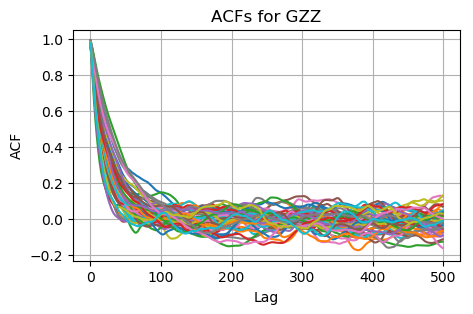

In [243]:
fig = figure("pyplot_barplot",figsize=(5,3))
n_samples = 10^4
maxlag_gzz = 500
acfs_gzz = zeros(d,maxlag)
discard = 0
filename  = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/lambda:"*string(lambda)*
            "-d:"*string(d)*"-Nobs:"*string(Nobs)*"-mb_size:"*string(mb_size)*".jld"
xt_skel, bt_skel = load(filename, "xt_skeleton", "bt_skeleton")
xi_samples_gzz = extract_samples(xt_skel[:,discard+1:end], 
                             bt_skel[:,discard+1:end], 
                            (bt_skel[end]-bt_skel[discard+1])/n_samples,
                            "linear")[:,1:end-1]
iacts_gzz = zeros(size(xi_samples_gzz,1))
for dim in 1:size(xi_samples_gzz,1)
    a = acf(xi_samples_gzz[dim,:],maxlag_gzz)
    plot(a)
    acfs_gzz[dim,:] = a
end
title("ACFs for GZZ")
xlabel("Lag")
ylabel("ACF")
grid(true)
xt_skel, bt_skel, xi_samples = [], [], []
gc()

### HMC:

### Tune HMC:

In [165]:
ξ0 = randn(d)
Total_time = 10
T = 250
Metropolise = false
Print = false
n_leapfrog_list = 20*(1:5);

In [166]:
xi_samples_hmc, hyper_samples_hmc, acc = 
zeros(d,T+1,length(n_leapfrog_list)), zeros(hyperparam_size(prior),T+1,length(n_leapfrog_list)), 
zeros(length(n_leapfrog_list));

In [167]:
for (i,n_leapfrog) in enumerate(reverse(n_leapfrog_list))
    start = time()
    prior = SS_prior(d, σ02)
    my_ll = ll_logistic_sp(X,y)
    my_model = model(my_ll, prior)
    stepsize = total_time/n_leapfrog
    xi_samples_hmc[:,:,i], hyper_samples_hmc[:,:,i], acc[i] = 
    GibbsHMC(my_model, ξ0, stepsize, n_leapfrog, T, Metropolise, Print)
    print("n_leapfrog = ", n_leapfrog, " in ", round((time()-start)/60,2), " mins \n")
end

HMC acceptance = 100.0 percent; n_leapfrog = 100 in 1.49 mins 
HMC acceptance = 100.0 percent; n_leapfrog = 80 in 1.19 mins 
HMC acceptance = 100.0 percent; n_leapfrog = 60 in 0.9 mins 


LoadError: [91mArgumentError: InverseGamma: the condition α > zero(α) && θ > zero(θ) is not satisfied.[39m

In [1]:
Metropolise = true 
Print = false

stepsize = Total_time/50
total_times = 5*stepsize*(5:15)
n_leapfrog_steps = 5*(1:10)

for total_time in total_times
    print("Total time = ", round(total_time,2), "\n")
    for n_leapfrog in n_leapfrog_steps
        start = time()
        prior = SS_prior(d, σ02)
        my_ll = ll_logistic_sp(X,y)
        my_model = model(my_ll, prior)
        a, b, c = 
        GibbsHMC(my_model, ξ0, total_time/n_leapfrog, n_leapfrog, 500, Metropolise, Print)
        print("n_leapfrog = ", n_leapfrog, " in ", round((time()-start)/60,2), " mins \n")
    end
end

LoadError: [91mUndefVarError: Total_time not defined[39m

In [182]:
total_times_optimal = 5:11
n_leapfrog_optimal = [25,30,35,40,45,50,50]
T = 5000
Metropolise = true
Print = false

for (i,total_time) in enumerate(total_times_optimal) 
    start = time()
    prior = SS_prior(d, σ02)
    my_ll = ll_logistic_sp(X,y)
    my_model = model(my_ll, prior)
    xi_samples_hmc, hyper_samples_hmc, acc =
    GibbsHMC(my_model, ξ0, total_time/n_leapfrog_optimal[i], n_leapfrog_optimal[i], T, Metropolise, Print)
    print("n_leapfrog = ", n_leapfrog_optimal[i], " in ", round((time()-start)/60,2), " mins \n")
    filename  = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/GibbsHMC:total_time:"*
                string(total_time)*"-n_leapfrog:"*string(n_leapfrog_optimal[i])*".jld"
    save(filename, "xi_samples", xi_samples_hmc, "hyper_samples", hyper_samples_hmc, "acc", acc)
    xi_samples_hmc, hyper_samples_hmc, acc = [], [], []
    gc()
end

HMC acceptance = 65.44 percent; n_leapfrog = 25 in 7.63 mins 
HMC acceptance = 64.46 percent; n_leapfrog = 30 in 9.12 mins 
HMC acceptance = 65.54 percent; n_leapfrog = 35 in 10.78 mins 
HMC acceptance = 65.62 percent; n_leapfrog = 40 in 12.0 mins 
HMC acceptance = 64.24 percent; n_leapfrog = 45 in 13.52 mins 
HMC acceptance = 65.82 percent; n_leapfrog = 50 in 15.1 mins 
HMC acceptance = 56.04 percent; n_leapfrog = 50 in 15.31 mins 


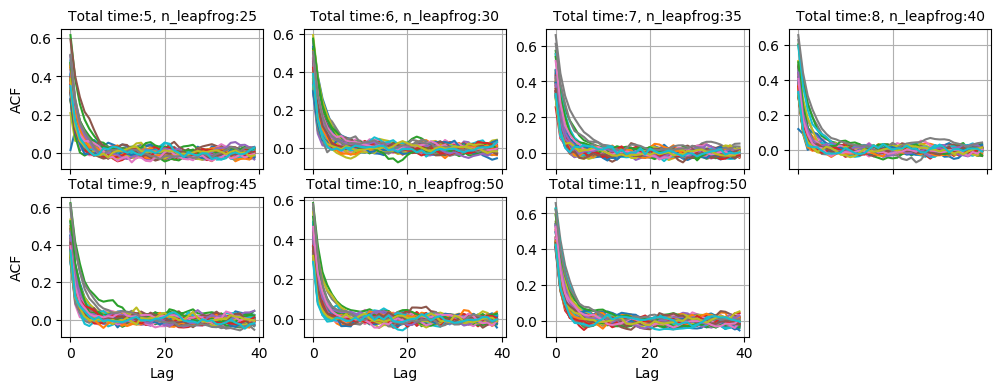

In [223]:
maxlag_hmc = 40
fig = figure(figsize=(12,4))
acfs_hmc = zeros(length(total_times_optimal),size(xi_samples_hmc,1),maxlag_hmc)

for i in 1:2 
    for j in 1:4
        k = 4*(i-1)+j
        if k < 8
            total_time, n_leapfrog = total_times_optimal[k], n_leapfrog_optimal[k]
            filename  = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/GibbsHMC:total_time:"*
                        string(total_time)*"-n_leapfrog:"*string(n_leapfrog)*".jld"
            xi_samples_hmc = load(filename, "xi_samples")

            subplot(2,4,k)
            for dim in 1:size(xi_samples_hmc,1) 
                a = acf(xi_samples_hmc[dim,:], maxlag_hmc)
                plot(a)
                acfs_hmc[k,dim,:] = a
            end
            grid(true)  
            title("Total time:"*string(total_time)*", n_leapfrog:"*string(n_leapfrog), fontsize=10)
            xi_samples_hmc = []
            gc()
            if i == 2 xlabel("Lag") end
            if i == 1 xticks(alpha=0) end
            if j == 1 ylabel("ACF") end
        end
    end
end


In [262]:
hmc_mixing = T./maximum(sum(acfs_hmc[:,:,1:20],3),2)
hmc_cost = T*n_leapfrog_optimal*Nobs;

In [265]:
gzz_mixing = n_samples/maximum(sum(acfs_gzz[:,1:200],2))
gzz_cost = max_attempts*mb_size;

In [266]:
(gzz_mixing/gzz_cost)./(hmc_mixing./hmc_cost)

7×1×1 Array{Float64,3}:
[:, :, 1] =
 2.59138
 3.18553
 5.08597
 5.31613
 6.61461
 5.95097
 5.9546 